# Decision Tree - For Binary Classification
---
Decision Tree is a supervisioned algorithm for __classification__ and __regression__

Source: https://scikit-learn.org/stable/modules/tree.html

StatQuest Explanation: https://www.youtube.com/watch?v=7VeUPuFGJHk

## Exercise
Original Source: https://colab.research.google.com/drive/1ylh4d-2sataspUVV9BusDjWh41ek7aAz?usp=sharing#scrollTo=JG3St2rL-KHx

---

### **CHUVA**


Chuva fraca: quando a intensidade é inferior a 5 mm/h.

Chuva moderada: quando a intensidade está entre 5 e 25 mm/h.

Chuva forte: quando a intensidade está compreendida entre 25,1 e 50 mm/h.

Chuva muito forte: quando a intensidade é igual ou superior a 50 mm/h.

Pancadas de chuva: Precipitação intensa ocorrida em curto período de tempo e espacialmente restrita.

Fonte: https://tinyurl.com/v4d72g5


### **VENTO**

Brisa: é um vento de pouca intensidade, com velocidade inferior a 54 km/h.

Ciclone: é o nome genérico para ventos circulares, como tufão, furacão, tornado e willy-willy. Caracteriza-se por uma tempestade violenta que ocorre em regiões tropicais ou subtropicais, produzida por grandes massas de ar em alta velocidade de rotação. Evidencia-se quando ventos os superam 50 km/h.

Furacão: vento circular forte, com velocidade igual ou superior a 108 km/h. Os furacões são os ciclones que surgem no mar do Caribe (Oceano Atlântico) ou nos EUA. Os ventos precisam ter mais de 119 km/h para uma tempestade ser considerada um furacão. Giram no sentido horário (no Hemisfério Sul) ou anti-horário (no Hemisfério Norte) e medem de 200 km a 400 km de diâmetro. Sua curva se assemelha a uma parabólica.

Tufão: é o nome que se dá aos ciclones formados no sul da Ásia e na parte ocidental do Oceano Índico, entre julho e outubro. É o mesmo que furacão, só que na região equatorial do Oceano Pacífico. Os tufões surgem no mar da China e atingem o leste asiático.

Willy-willy: nome que os ciclones recebem na Austrália e demais países do sul da Oceania.

Tornado: é o mais forte dos fenômenos meteorológicos, menor e mais intenso que os demais tipos de ciclone. Com alto poder de destruição, atinge até 490 km/h de velocidade no centro do cone. Produz fortes redemoinhos e eleva poeira. Forma-se entre 10 e 30 minutos e tem, no máximo, 10 km de diâmetro. O tornado é menor e em geral mais breve do que o furacão, e ocorre em zonas temperadas do Hemisfério Norte.

Vendaval: vento forte com um grande poder de destruição, que chega a atingir até 150 km/h. Ocorre geralmente de madrugada e sua duração pode ser de até cinco horas.

Fonte: https://www1.folha.uol.com.br/folha/mundo/furacao_pop_ventos.html

### Data

In [1]:
temperature = [5, 8, 10, 12, 14, 14, 18, 21, 21,  10, 23, 24, 24, 25, 25, 26, 26, 26, 27, 27, 28, 28, 30, 32, 32] #celsius
rainfall    = [0, 25, 0, 2, 0,  4,  0,  0,  7, 20, 5, 0, 12, 35,  7, 0,  23, 25, 32, 0, 3,  4,  0,  2,  5] #mm/hora
wind_speed  = [5, 8,  2, 22,   12, 8,  0,  58, 62,  25, 18,   5, 12, 35,  7, 0,  23, 25, 32, 0, 3,  4,  0,  5,  2] #km/h
did_bike    = [True, False, True, True, True,  True,  True,  False, False,  False, True, True, True,  False,  True, True,  False, False, False, True, False, False, False, False, False]

In [2]:
# Transforming data
weather_conditions = []
for i in range(len(temperature)): 
  weather_conditions.append([temperature[i], rainfall[i], wind_speed[i]]) 

# OR
import numpy as np
weather_conditions = np.stack([temperature, rainfall, wind_speed], axis=1)

### Resolution

In [3]:
from sklearn import tree

X = weather_conditions
y = did_bike

classifier = tree.DecisionTreeClassifier()
classifier.fit(X, y)

classifier.score(X, y)

1.0

#### Testing the prediction

In [4]:
test = [[22, 15, 21], [31, 8, 12], [6, 30, 5], [33, 40, 60]]
classifier.predict(test)

array([ True, False, False, False])

#### Plotting Tree

[Text(223.20000000000002, 190.26, 'X[2] <= 22.5\ngini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(167.4, 135.9, 'X[0] <= 27.5\ngini = 0.444\nsamples = 18\nvalue = [6, 12]'),
 Text(111.60000000000001, 81.53999999999999, 'X[1] <= 18.5\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

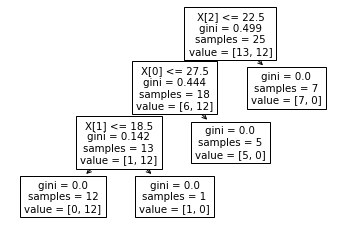

In [5]:
tree.plot_tree(classifier)

## Plotting using [**Graphviz**](https://graphviz.org/download/)

### To understand more about __decision trees__, fill the sheet file: `../others/decision-tree-how-to-do.numbers`

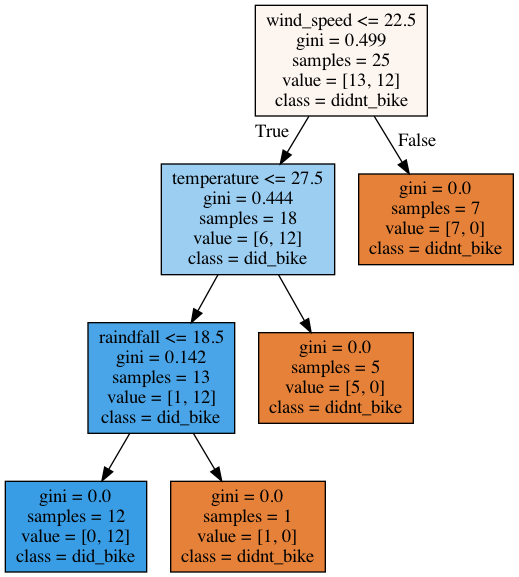

In [6]:
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
tree.export_graphviz(classifier, out_file=dot_data, filled=True, feature_names=['temperature', 'raindfall', 'wind_speed'], class_names=['didnt_bike', 'did_bike']) # i don't know if the class names order are right :/

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())